# Task 5: Sales Prediction using Python

# 1. Importing the necessary dependencies

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.feature_selection import mutual_info_regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_log_error
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("Advertising.zip")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# 2. DATA PREPROCESSING

In [3]:
df.shape

(200, 5)

In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
df.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [6]:
df.tail(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
190,191,39.5,41.1,5.8,10.8
191,192,75.5,10.8,6.0,9.9
192,193,17.2,4.1,31.6,5.9
193,194,166.8,42.0,3.6,19.6
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
df.duplicated().sum()

0

# 3. OUTLIER

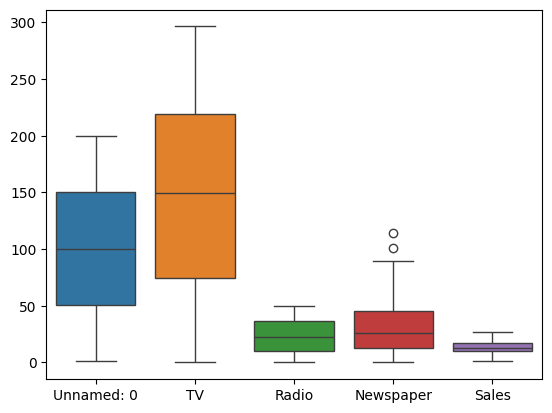

In [11]:
sns.boxplot(df)
plt.show()

In [12]:
x = df.drop(["Sales"],axis=1)
y = df[["Sales"]]

# 4. DATA STANDERDIZATION

In [13]:
s = StandardScaler()
s_std = s.fit_transform(x)
s_std

array([[-1.72341210e+00,  9.69852266e-01,  9.81522472e-01,
         1.77894547e+00],
       [-1.70609137e+00, -1.19737623e+00,  1.08280781e+00,
         6.69578760e-01],
       [-1.68877065e+00, -1.51615499e+00,  1.52846331e+00,
         1.78354865e+00],
       [-1.67144992e+00,  5.20496822e-02,  1.21785493e+00,
         1.28640506e+00],
       [-1.65412920e+00,  3.94182198e-01, -8.41613655e-01,
         1.28180188e+00],
       [-1.63680847e+00, -1.61540845e+00,  1.73103399e+00,
         2.04592999e+00],
       [-1.61948775e+00, -1.04557682e+00,  6.43904671e-01,
        -3.24708413e-01],
       [-1.60216702e+00, -3.13436589e-01, -2.47406325e-01,
        -8.72486994e-01],
       [-1.58484630e+00, -1.61657614e+00, -1.42906863e+00,
        -1.36042422e+00],
       [-1.56752558e+00,  6.16042873e-01, -1.39530685e+00,
        -4.30581584e-01],
       [-1.55020485e+00, -9.45155670e-01, -1.17923146e+00,
        -2.92486143e-01],
       [-1.53288413e+00,  7.90028350e-01,  4.96973404e-02,
      

In [14]:
df1 = pd.DataFrame(s_std,columns=['Unnamed: 0', 'TV', 'Radio', 'Newspaper'])
df1["Sales"] = y
df1

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,-1.723412,0.969852,0.981522,1.778945,22.1
1,-1.706091,-1.197376,1.082808,0.669579,10.4
2,-1.688771,-1.516155,1.528463,1.783549,9.3
3,-1.671450,0.052050,1.217855,1.286405,18.5
4,-1.654129,0.394182,-0.841614,1.281802,12.9
...,...,...,...,...,...
195,1.654129,-1.270941,-1.321031,-0.771217,7.6
196,1.671450,-0.617035,-1.240003,-1.033598,9.7
197,1.688771,0.349810,-0.942899,-1.111852,12.8
198,1.706091,1.594565,1.265121,1.640850,25.5


# 5. EDA

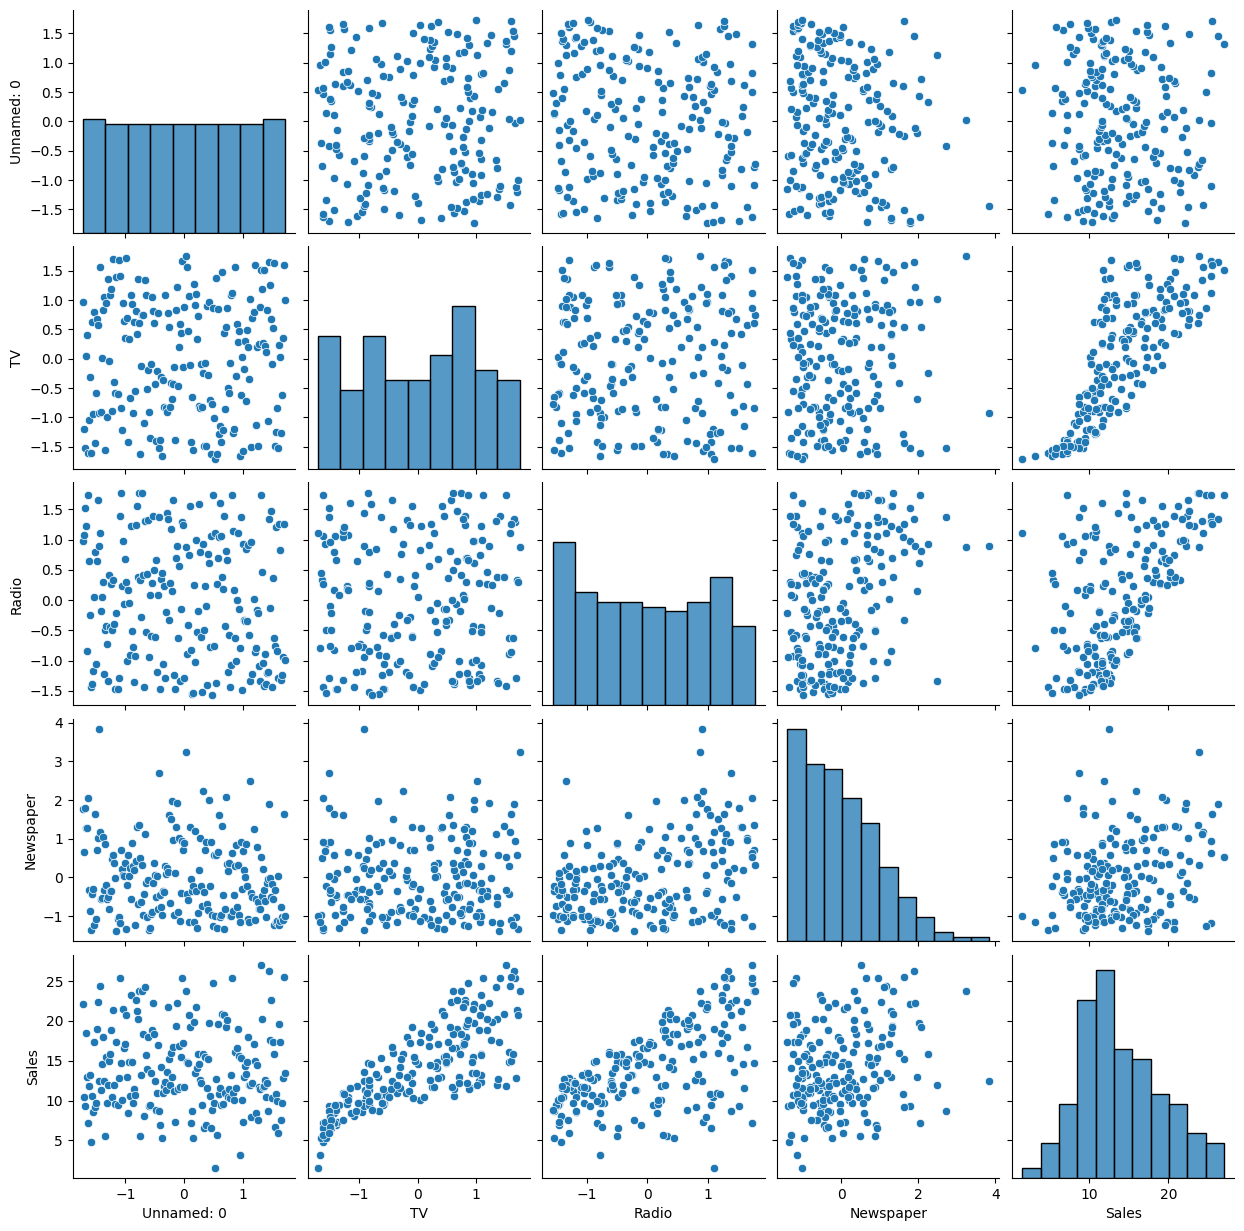

In [15]:
sns.pairplot(df1)

<Axes: >

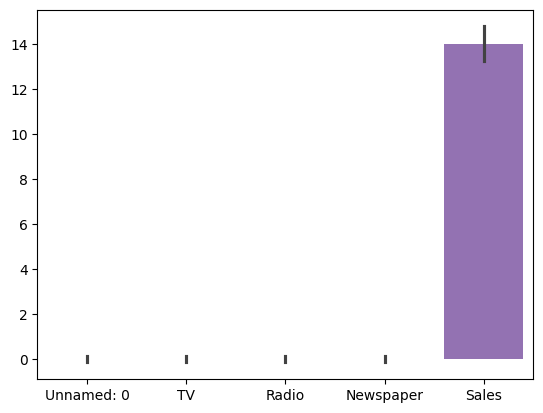

In [16]:
sns.barplot(df1)

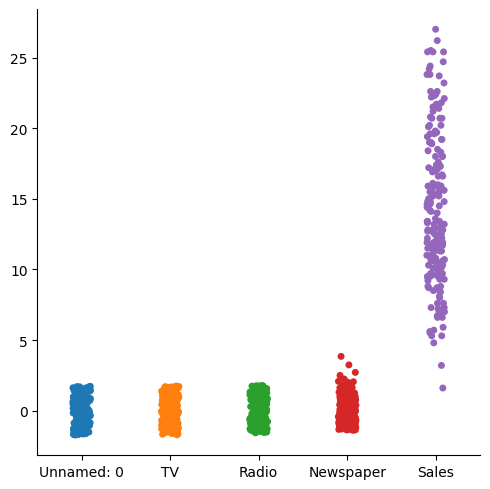

In [17]:
sns.catplot(df1)

<Axes: ylabel='Count'>

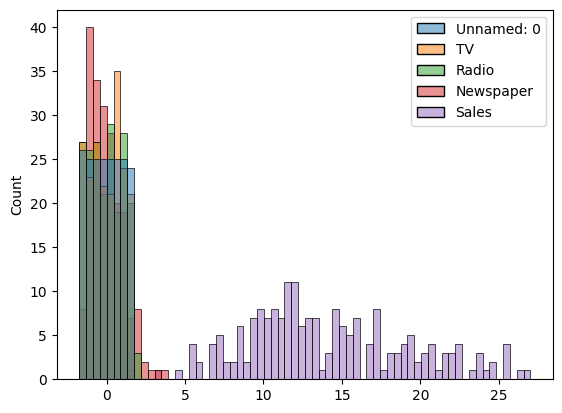

In [18]:
sns.histplot(df1)

<Figure size 1000x600 with 0 Axes>

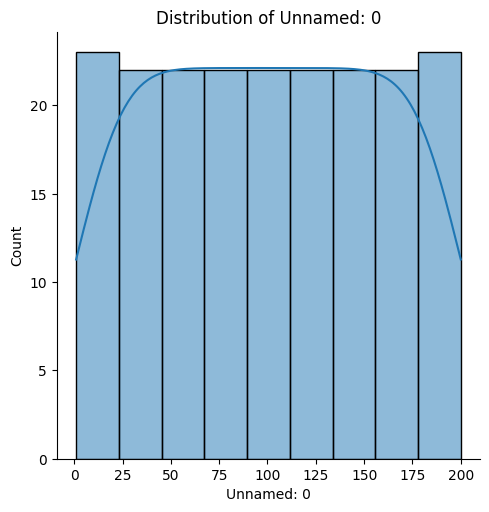

<Figure size 1000x600 with 0 Axes>

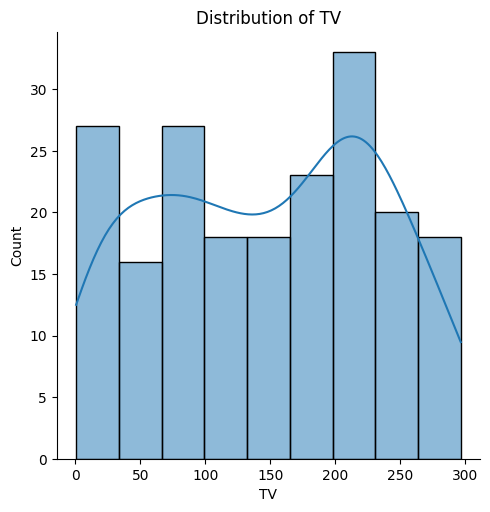

<Figure size 1000x600 with 0 Axes>

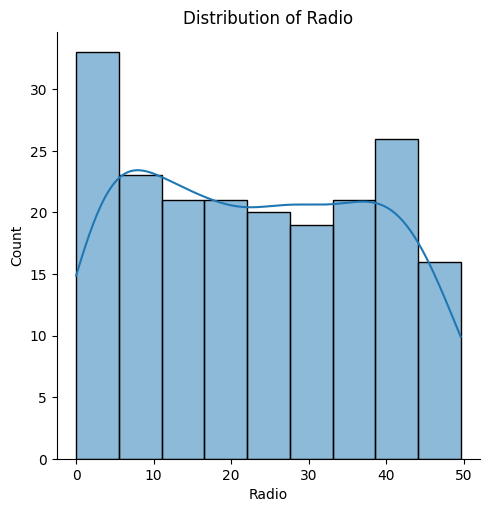

<Figure size 1000x600 with 0 Axes>

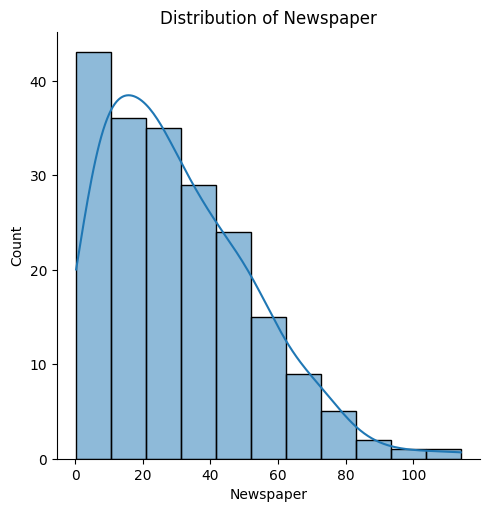

In [19]:
numerical_features = ['Unnamed: 0', 'TV', 'Radio', 'Newspaper']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.displot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# 6.FEATURE SELECTION

<Axes: >

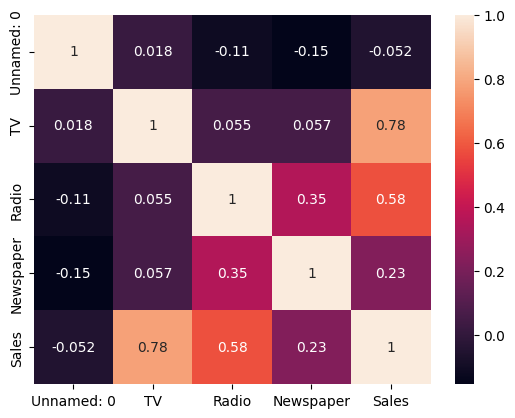

In [20]:
sns.heatmap(df1.corr(),annot=True)

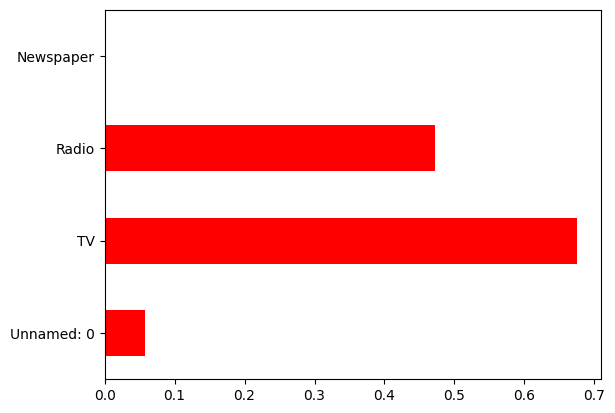

In [21]:
m = mutual_info_regression(x,y)
v = pd.Series(m,df1.columns[0:len(df1.columns)-1])
v.plot(kind = "barh", color = "red")
plt.show()

In [22]:
x1 = df1[['Radio','TV']]
y1 = y

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=99)

# 7. MODEL IMPLEMENTATION

# LINEAR REGRESSION

In [24]:
L = LinearRegression()

In [25]:
L.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred = L.predict(x_test)

In [27]:
r2_score(y_test,y_pred)

0.9232841941470026

In [28]:
mean_squared_log_error(y_test,y_pred)

0.020041860099150655

# RANDOM FOREST

In [29]:
r = RandomForestRegressor()

In [30]:
par = {"n_estimators" : [10,20,50,90],"criterion" : ["squared_error", "absolute_error", "friedman_mse", "poisson"] ,"max_depth" : [1,2,3,4,5,6]}

In [31]:
g = GridSearchCV(r,par,cv=4)

In [32]:
g.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [10, 20, 50, 90]})

In [33]:
y_pred = g.predict(x_test)

In [34]:
r2_score(y_test,y_pred)

0.9847678890683625

In [35]:
mean_squared_log_error(y_test,y_pred)

0.004990476509981879